## Import Dependencies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
FERTILIZER_VALUES = [1,2,3]
WATER_VALUES = [40,60,80]

In [45]:
def experiment_model(fertilizer, water):
    sunlight = np.random.normal(11,1)
    return sunlight, 6 + 0.5*sunlight \
        + 10 / (1 + 0.005*(water - 90)**2) \
        + 50 / (1 + np.exp(-0.1*(fertilizer - 2)))    

## Generate Data

In [46]:
from itertools import product

data_columns = [
    'Fertilizer Type', 
    'Water (L/day)', 
    'Sunlight (hours/day)',
    'Tree Height (m)'
]

data = []
for (fertilizer,water) in product(FERTILIZER_VALUES, WATER_VALUES):
    sunlight, result = experiment_model(fertilizer,water)
    data.append((fertilizer,water,round(sunlight,2),round(result,2)))

experiment_df = pd.DataFrame(data, columns=data_columns)
display(experiment_df)

,Fertilizer Type,Water (L/day),Sunlight (hours/day),Tree Height (m)
0,1,40,10.00,35.49
1,1,60,8.41,35.77
2,1,80,10.86,41.85
3,2,40,10.54,37.01
4,2,60,10.85,38.24
5,2,80,9.86,42.60
6,3,40,10.21,38.09
7,3,60,11.54,39.84
8,3,80,10.26,44.05


In [47]:
DATASET_CSV_FILE = 'treefarm_dataset.csv'
experiment_df.to_csv(DATASET_CSV_FILE)

## Linear Regression Analysis:

In [48]:
w_is = []
for i in FERTILIZER_VALUES:
    df_i = experiment_df[experiment_df['Fertilizer Type'] == i]
    X_i, y_i = df_i.iloc[:,1:3].values, df_i.iloc[:,3].values
    X_i = np.hstack([X_i, np.ones((len(X_i),1)) ])
    w_i = np.linalg.pinv(X_i) @ y_i
    w_is.append(w_i)

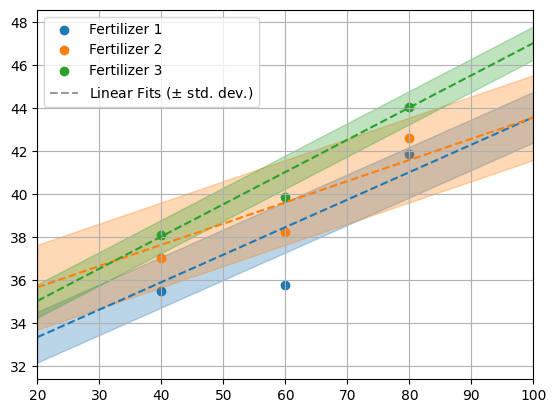

In [49]:
water_vals = np.linspace(20,100,200)
sunlight_mean = np.mean(experiment_df.iloc[:,2])
sunlight_std = np.std(experiment_df.iloc[:,2])

sigma = np.diag([0,sunlight_std**2,0])

plt.figure()
for i, w_i in zip(FERTILIZER_VALUES, w_is):
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    X_i_eval = np.array([[w, sunlight_mean, 1] for w in water_vals])
    y_i_mean = X_i_eval @ w_i
    y_i_std = np.sqrt(w_i.T @ sigma @ w_i)
        
    df_i = experiment_df[experiment_df['Fertilizer Type'] == i]
    
    plt.scatter(df_i.iloc[:,1], df_i.iloc[:,3], label=f'Fertilizer {i}', color=col)
    plt.fill_between(water_vals,y_i_mean+y_i_std,y_i_mean-y_i_std, 
                     color=col, alpha=0.3)
    plt.plot(water_vals,y_i_mean, '--', color=col)

plt.xlim((20,100))
plt.grid()
plt.plot([],[],'k--', alpha=0.4, label=r'Linear Fits ($\pm$ std. dev.)')
plt.legend()
plt.show()

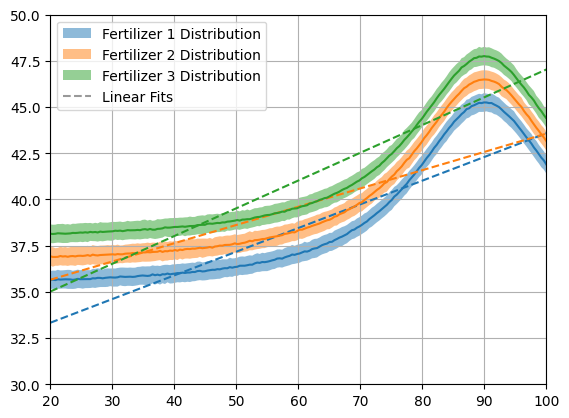

In [50]:
plt.figure()
for i, w_i in zip(FERTILIZER_VALUES, w_is):
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    X_i_eval = np.array([[w, sunlight_mean, 1] for w in water_vals])
    y_i_mean = X_i_eval @ w_i
    y_i_std = np.sqrt(w_i.T @ sigma @ w_i)
    df_i = experiment_df[experiment_df['Fertilizer Type'] == i]
        
    exact_heights = np.array([ 
        np.mean([experiment_model(i, w)[1] for _ in range(1000) ])
        for w in water_vals 
    ])
    
    exact_height_stds = np.array([ 
        np.std([experiment_model(i, w)[1] for _ in range(1000) ])
        for w in water_vals 
    ])
    
    X_i_eval = np.array([[w, sunlight_mean, 1] for w in water_vals])
    y_i_mean = X_i_eval @ w_i
    
    plt.plot(water_vals,exact_heights, '-', color=col)
    plt.fill_between(water_vals, 
                     exact_heights+exact_height_stds,
                     exact_heights-exact_height_stds,
                     alpha=0.5, label=f'Fertilizer {i} Distribution')
    
    plt.plot(water_vals, y_i_mean, '--', color=col)

plt.plot([],[],'k--', alpha=0.4, label='Linear Fits')
plt.xlim((20,100))
plt.ylim((30,50))
plt.grid()
plt.legend()
plt.show()

## ANOVA Analysis

In [9]:
# TODO

## Bayesian Modeling

In [10]:
# TODO